In [2]:
from keras.layers import Input, Dense
from keras.models import Model

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
datadir = '/Users/sidv88/Documents/Data_Management_2/Data/'
train_data = pd.read_csv(datadir + 'train_rgb.csv')
test_data = pd.read_csv(datadir + 'test_rgb.csv')
print(train_data.shape)
print(test_data.shape)

(50000, 3074)
(10000, 3074)


In [4]:
train_data.head()

,Class,Class Name,0,1,2,3,4,5,6,7,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,6,frog,59,62,63,43,46,45,50,48,...,104,216,184,140,151,118,84,123,92,72
1,9,truck,154,177,187,126,137,136,105,104,...,136,143,133,139,143,134,142,143,133,144
2,9,truck,255,255,255,253,253,253,253,253,...,79,78,85,83,79,85,83,80,86,84
3,4,deer,28,25,10,37,34,19,38,35,...,38,54,47,28,63,56,37,72,65,46
4,1,automobile,170,180,198,168,178,196,177,185,...,78,75,79,82,71,75,78,73,77,80


In [5]:
test_data.head()

,Class,Class Name,0,1,2,3,4,5,6,7,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,3,cat,158,112,49,159,111,47,165,116,...,145,24,77,124,34,84,129,21,67,110
1,8,ship,235,235,235,231,231,231,232,232,...,163,168,183,178,180,195,191,186,200,199
2,8,ship,158,190,222,158,187,218,139,166,...,37,5,6,8,4,5,3,7,8,7
3,0,airplane,155,156,149,167,176,187,176,179,...,53,60,63,50,64,65,52,73,68,50
4,6,frog,65,68,50,70,81,64,48,64,...,147,143,179,136,154,185,146,128,156,117


In [6]:
x_train = train_data.iloc[:, 2:]
print(x_train.shape)
y_train = train_data.iloc[:, [0, 1]]
print(y_train.shape)

(50000, 3072)
(50000, 2)


In [7]:
x_test = test_data.iloc[:, 2:]
print(x_test.shape)
y_test = test_data.iloc[:, [0, 1]]
print(y_test.shape)

(10000, 3072)
(10000, 2)


In [8]:
x_train = np.array(x_train)
x_test = np.array(x_test)

In [9]:
print(x_train.shape)
print(x_test.shape)

(50000, 3072)
(10000, 3072)


In [10]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
print(x_train.shape)
print(x_test.shape)

(50000, 3072)
(10000, 3072)


In [11]:
input_img = Input(shape = (3072,))

In [12]:
encoded = Dense(units = 128, activation = 'relu')(input_img)
encoded = Dense(units = 128, activation = 'relu')(encoded)
encoded = Dense(units = 64, activation = 'relu')(encoded)
encoded = Dense(units = 64, activation = 'relu')(encoded)
encoded = Dense(units = 32, activation = 'relu')(encoded)
decoded = Dense(units = 64, activation = 'relu')(encoded)
decoded = Dense(units = 64, activation = 'relu')(decoded)
decoded = Dense(units = 128, activation = 'relu')(decoded)
decoded = Dense(units = 128, activation = 'relu')(decoded)
decoded = Dense(units = 3072, activation = 'sigmoid')(decoded)

In [13]:
autoencoder = Model(input_img, decoded)
encoder = Model(input_img, encoded)

In [14]:
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               393344    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_6 (Dense)              (None, 64)                2112

In [15]:
encoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               393344    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
Total params: 424,352
Trainable params: 424,352
Non-trainable params: 0
_____________________________________________________

In [16]:
autoencoder.compile(optimizer = 'adam', loss = 'mse', metrics = ['accuracy'])

In [17]:
autoencoder.fit(x_train, x_train, epochs = 100, batch_size = 256, shuffle = True, validation_data = [x_test, x_test])

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 10s 204us/step - loss: 0.0454 - accuracy: 0.0023 - val_loss: 0.0328 - val_accuracy: 0.0019
Epoch 2/100
50000/50000 [==============================] - 10s 204us/step - loss: 0.0311 - accuracy: 0.0020 - val_loss: 0.0307 - val_accuracy: 0.0020
Epoch 3/100
50000/50000 [==============================] - 10s 201us/step - loss: 0.0305 - accuracy: 0.0017 - val_loss: 0.0292 - val_accuracy: 0.0020
Epoch 4/100
50000/50000 [==============================] - 13s 255us/step - loss: 0.0276 - accuracy: 0.0028 - val_loss: 0.0266 - val_accuracy: 0.0022
Epoch 5/100
50000/50000 [==============================] - 13s 257us/step - loss: 0.0261 - accuracy: 0.0024 - val_loss: 0.0250 - val_accuracy: 0.0034
Epoch 6/100
50000/50000 [==============================] - 13s 263us/step - loss: 0.0250 - accuracy: 0.0028 - val_loss: 0.0249 - val_accuracy: 0.0021
Epoch 7/100
50000/50000 [=========================

Epoch 55/100
50000/50000 [==============================] - 16s 324us/step - loss: 0.0160 - accuracy: 0.0055 - val_loss: 0.0161 - val_accuracy: 0.0069
Epoch 56/100
50000/50000 [==============================] - 15s 297us/step - loss: 0.0160 - accuracy: 0.0058 - val_loss: 0.0160 - val_accuracy: 0.0059
Epoch 57/100
50000/50000 [==============================] - 14s 281us/step - loss: 0.0160 - accuracy: 0.0060 - val_loss: 0.0160 - val_accuracy: 0.0082
Epoch 58/100
50000/50000 [==============================] - 13s 258us/step - loss: 0.0159 - accuracy: 0.0058 - val_loss: 0.0159 - val_accuracy: 0.0066
Epoch 59/100
50000/50000 [==============================] - 13s 254us/step - loss: 0.0158 - accuracy: 0.0061 - val_loss: 0.0159 - val_accuracy: 0.0065
Epoch 60/100
50000/50000 [==============================] - 13s 253us/step - loss: 0.0158 - accuracy: 0.0059 - val_loss: 0.0159 - val_accuracy: 0.0069
Epoch 61/100
50000/50000 [==============================] - 13s 255us/step - loss: 0.0157 - ac

In [18]:
encoded_test_data = encoder.predict(x_test)
predicted_test_data = autoencoder.predict(x_test)

In [19]:
encoded_test_data.shape

(10000, 32)

In [20]:
encoded_test_data_df = pd.DataFrame(encoded_test_data)

In [21]:
y_test

,Class,Class Name
0,3,cat
1,8,ship
2,8,ship
3,0,airplane
4,6,frog
...,...,...
9995,8,ship
9996,3,cat
9997,5,dog
9998,1,automobile


In [23]:
final_encoded_test_data_df = pd.concat([y_test, encoded_test_data_df], axis = 1)
final_encoded_test_data_df.shape

(10000, 34)

In [24]:
datadir = '/Users/sidv88/Documents/Data_Management_2/Deep_Encoded_Data/'
final_encoded_test_data_df.to_csv(datadir + 'Deep_Encoders_Test_RSAM.csv', index = False)

In [25]:
input_val = input("Enter one of these values {} : ".format(final_encoded_test_data_df['Class Name'].unique()))

Enter one of these values ['cat' 'ship' 'airplane' 'frog' 'automobile' 'truck' 'dog' 'horse' 'deer'
 'bird'] : cat


In [26]:
input_num = input("Enter a number between 0 and 999 : ")

Enter a number between 0 and 999 : 8


In [28]:
from numpy import dot
from numpy.linalg import norm

cosine_similarity = []
cosine_distance = []

for i in range(len(x_test)):
    a = final_encoded_test_data_df.loc[final_encoded_test_data_df['Class Name'] == input_val].iloc[int(input_num), 2:]
    b = final_encoded_test_data_df.iloc[i, 2:]
    cos_sim = dot(a, b)/(norm(a) * norm(b))
    cos_dist = 1 - cos_sim
    cosine_similarity.append(cos_sim)
    cosine_distance.append(cos_dist)
print(len(cosine_similarity))
print(len(cosine_distance))

10000
10000


In [29]:
final_encoded_test_data_df['Cosine Similarity'] = cosine_similarity
final_encoded_test_data_df['Cosine Distance'] = cosine_distance

In [31]:
final_encoded_test_data_df.sort_values(by = ['Cosine Similarity'], ascending = False)

,Class,Class Name,0,1,2,3,4,5,6,7,...,24,25,26,27,28,29,30,31,Cosine Similarity,Cosine Distance
78,3,cat,6.640850,2.964600,0.0,0.0,5.612169,1.824859,0.0,1.914830,...,0.0,2.132102,3.481860,3.059533,2.024459,0.0,3.954248,1.970143,1.000000,1.192093e-07
5007,3,cat,7.300733,3.602438,0.0,0.0,5.851794,2.267994,0.0,2.387124,...,0.0,2.688529,4.231380,2.642400,2.293881,0.0,4.116699,3.659844,0.987693,1.230735e-02
1062,6,frog,4.575747,2.542161,0.0,0.0,3.707434,1.530236,0.0,1.084110,...,0.0,1.690898,2.200506,2.283003,1.958969,0.0,3.521726,2.264745,0.982814,1.718640e-02
8802,6,frog,6.272382,2.734352,0.0,0.0,3.607210,1.978663,0.0,2.254426,...,0.0,1.939586,3.781731,3.253941,2.834378,0.0,2.638288,2.660464,0.980523,1.947665e-02
7083,6,frog,5.549685,3.091393,0.0,0.0,4.002613,2.430524,0.0,2.489772,...,0.0,2.073582,3.022067,2.954539,2.973402,0.0,3.295546,2.542310,0.980272,1.972812e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2358,7,horse,4.354886,2.782332,0.0,0.0,2.007102,4.249287,0.0,4.249652,...,0.0,1.629199,2.720281,4.830334,3.665843,0.0,3.129249,4.849688,0.810659,1.893410e-01
8537,0,airplane,7.453012,1.446214,0.0,0.0,0.000000,2.433373,0.0,5.530651,...,0.0,4.264505,4.486315,3.560249,6.040124,0.0,0.063112,1.996634,0.808928,1.910725e-01
6133,0,airplane,4.352598,3.865803,0.0,0.0,2.554535,4.843008,0.0,4.864864,...,0.0,3.431576,2.612485,4.391548,7.320723,0.0,0.633079,2.963771,0.808695,1.913046e-01
1528,2,bird,3.082250,1.578037,0.0,0.0,3.185432,3.428673,0.0,6.065405,...,0.0,2.986881,2.140421,4.488883,7.881889,0.0,1.432328,1.826922,0.803052,1.969478e-01


In [32]:
cosine_index = final_encoded_test_data_df.sort_values(by = ['Cosine Similarity'], ascending = False).head(10).index

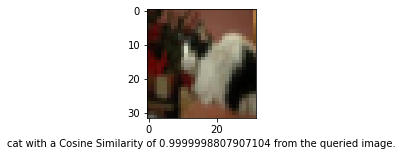

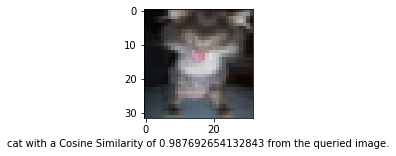

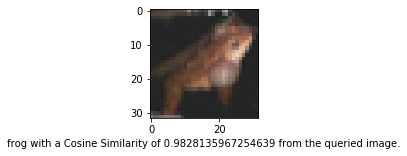

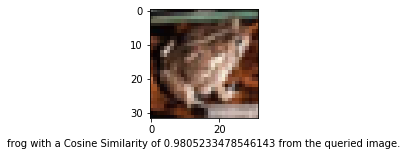

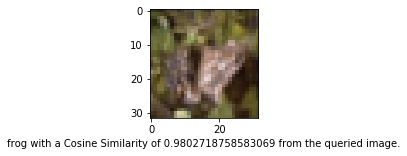

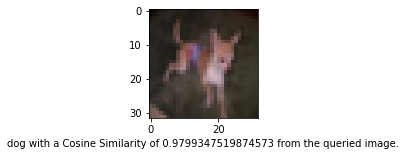

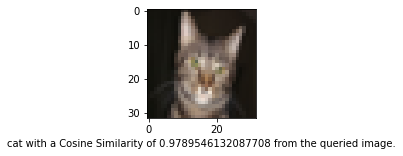

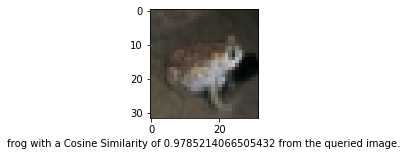

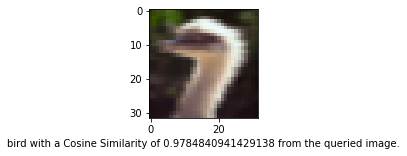

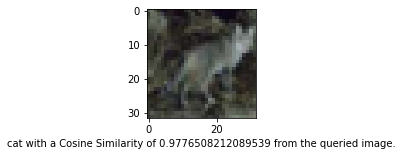

In [36]:
for i in cosine_index:
    plt.figure(figsize = (2, 2))
    plt.imshow(x_test[i].reshape(32, 32, 3))
    plt.xlabel(final_encoded_test_data_df['Class Name'][i] + ' with a Cosine Similarity of ' + str(final_encoded_test_data_df['Cosine Similarity'][i]) + ' from the queried image.')
    plt.show()

In [37]:
euclidean_distance = []

for i in range(len(x_test)):
    a = final_encoded_test_data_df.loc[final_encoded_test_data_df['Class Name'] == input_val].iloc[int(input_num), 2:]
    b = final_encoded_test_data_df.iloc[i, 2:]
    euc_dist = np.linalg.norm(a-b)
    euclidean_distance.append(euc_dist)
print(len(euclidean_distance))

10000


In [38]:
final_encoded_test_data_df['Euclidean Distance'] = euclidean_distance
final_encoded_test_data_df.sort_values(by = ['Euclidean Distance'])

,Class,Class Name,0,1,2,3,4,5,6,7,...,25,26,27,28,29,30,31,Cosine Similarity,Cosine Distance,Euclidean Distance
78,3,cat,6.640850,2.964600,0.0,0.0,5.612169,1.824859,0.0,1.914830,...,2.132102,3.481860,3.059533,2.024459,0.0,3.954248,1.970143,1.000000,1.192093e-07,0.000000
5007,3,cat,7.300733,3.602438,0.0,0.0,5.851794,2.267994,0.0,2.387124,...,2.688529,4.231380,2.642400,2.293881,0.0,4.116699,3.659844,0.987693,1.230735e-02,3.150233
8802,6,frog,6.272382,2.734352,0.0,0.0,3.607210,1.978663,0.0,2.254426,...,1.939586,3.781731,3.253941,2.834378,0.0,2.638288,2.660464,0.980523,1.947665e-02,3.205886
7083,6,frog,5.549685,3.091393,0.0,0.0,4.002613,2.430524,0.0,2.489772,...,2.073582,3.022067,2.954539,2.973402,0.0,3.295546,2.542310,0.980272,1.972812e-02,3.251686
4886,3,cat,6.689804,3.376336,0.0,0.0,5.138989,2.575001,0.0,1.142852,...,1.965909,4.158572,3.046404,1.177577,0.0,3.915760,2.986712,0.978955,2.104539e-02,3.353100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1494,7,horse,12.295256,8.664811,0.0,0.0,5.895654,3.369156,0.0,1.611496,...,2.152839,2.983651,5.116788,5.546991,0.0,7.474122,5.965838,0.935718,6.428194e-02,16.345137
3561,7,horse,9.980555,9.571051,0.0,0.0,3.620441,5.980847,0.0,3.004792,...,2.718991,4.559947,6.854459,4.873492,0.0,6.855383,8.173753,0.925524,7.447582e-02,16.726460
9385,7,horse,12.243818,11.127270,0.0,0.0,6.634604,3.329263,0.0,1.887478,...,3.180704,4.586612,4.408925,3.356696,0.0,6.969890,7.667644,0.934547,6.545335e-02,17.652825
4634,7,horse,10.805875,10.932146,0.0,0.0,5.003939,7.256120,0.0,2.171016,...,3.405692,8.141213,4.599672,2.117185,0.0,6.842929,10.584331,0.902854,9.714597e-02,19.353331


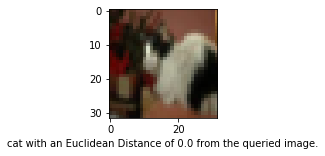

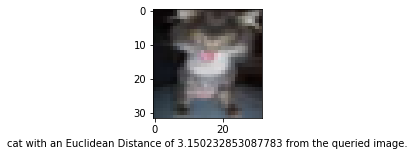

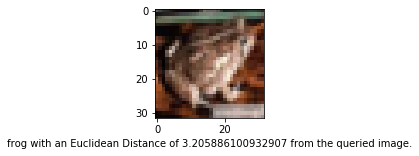

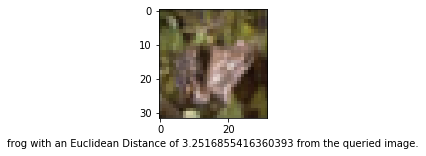

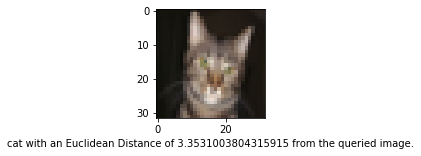

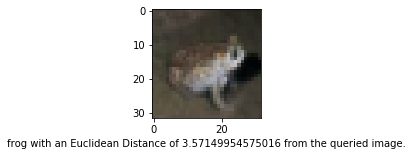

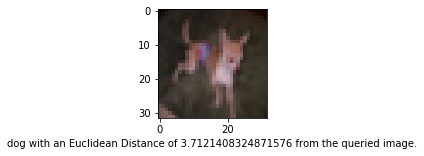

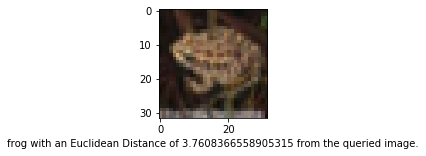

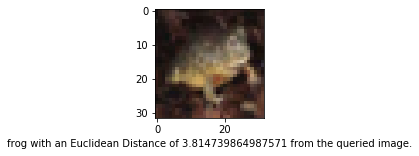

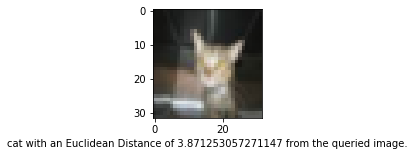

In [39]:
euclidean_index = final_encoded_test_data_df.sort_values(by = ['Euclidean Distance']).head(10).index

for i in euclidean_index:
    plt.figure(figsize = (2, 2))
    plt.imshow(x_test[i].reshape(32, 32, 3))
    plt.xlabel(final_encoded_test_data_df['Class Name'][i] + ' with an Euclidean Distance of ' + str(final_encoded_test_data_df['Euclidean Distance'][i]) + ' from the queried image.')
    plt.show()